<a href="https://colab.research.google.com/github/Natalia9922/House_Price_Prediction/blob/main/House_Price_Prediction_NPawlowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices in Poland
Do EDA and Create Model that Predict the price of apartments.
Origin: https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland

## About Dataset

**Context**

The data has been pre-cleaned but still needs to be take care of. The data come from one of the websites, where we can find advertisements of the sale of apartments. The data is from February 2021.

**Content**
Description:

* address - Full addres
* city - Warszawa (Warsaw), Kraków (Cracow), Poznań (Poznan).
* floor - The number of the floor where the apartment is located
* id - id
* latitude - latitude
* longitude - longitude
* price - Price of apartment in PLN [TARGET]
* rooms - Number of rooms in the apartment
* sq - Number of square meters of the apartment
* year - Year of the building / apartment

# 1. Data preparation

## 1.1. Instaling Libraries

In [4]:
!pip3 install xgboost
# algorithm based on gradient boosting of decision trees.
!pip install geopandas
!pip install folium

In [5]:
!pip install wrapt

## 1.2. Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score
from sklearn.impute import KNNImputer
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
import xgboost
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy.stats import kurtosis, skew
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn import preprocessing
import geopandas as gpd
import math
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

from __future__ import print_function
import keras
from keras import metrics
from keras import regularizers

In [7]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## 1.3. Loading Dataset

In [8]:
#defining a data frame
house_price = pd.read_csv('Houses_pl.csv',encoding='latin-1')

# 2. Exploratory Data Analysis (EDA)
* return the first and last 5 rows, for verification, to make sure that the data has been correctly loaded and processed
* check the column name and the look of the data

In [9]:
house_price.head() # return the first 5 rows

Unnamed: 0                                            address      city  \
0           0           Podgórze Zab³ocie Stanis³awa Klimeckiego    Kraków   
1           1                          Praga-Po³udnie Grochowska  Warszawa   
2           2                            Krowodrza Czarnowiejska    Kraków   
3           3                                           Grunwald    Poznañ   
4           4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa   

   floor       id   latitude  longitude      price  rooms      sq    year  
0    2.0  23918.0  50.049224  19.970379   749000.0    3.0   74.05  2021.0  
1    3.0  17828.0  52.249775  21.106886   240548.0    1.0   24.38  2021.0  
2    2.0  22784.0  50.066964  19.920025   427000.0    2.0   37.00  1970.0  
3    2.0   4315.0  52.404212  16.882542  1290000.0    5.0  166.00  1935.0  
4    1.0  11770.0  52.212225  20.972630   996000.0    5.0  105.00  2020.0

In [10]:
house_price.tail() # return the last 5 rows

Unnamed: 0                             address      city  floor  \
23759       23759             Stare Miasto Naramowice    Poznañ    0.0   
23760       23760                              W³ochy  Warszawa    4.0   
23761       23761     Nowe Miasto Malta ul. Katowicka    Poznañ    0.0   
23762       23762  Podgórze Duchackie Walerego S³awka    Kraków    6.0   
23763       23763                             Ursynów  Warszawa    2.0   

            id   latitude  longitude     price  rooms     sq    year  
23759   3976.0  52.449649  16.949408  543000.0    4.0  77.00  2020.0  
23760  10206.0  52.186109  20.948438  910000.0    3.0  71.00  2017.0  
23761   4952.0  52.397345  16.961939  430695.0    3.0  50.67  2022.0  
23762  24148.0  50.024231  19.959569  359000.0    2.0  38.86  2021.0  
23763  10889.0  52.141039  21.032321  604800.0    3.0  63.00  1978.0

In [11]:
# checking number of rows and columns (rows, columns)
house_price.shape

(23764, 11)

In [12]:
# returns the number of elements in the DataFrame
house_price.size

261404

In [13]:
# view the name of the column
house_price.columns

Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')

In [14]:
# prints information about the DataFrame
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


DataFrame contains 11 columns, 2 categorical, 9 numerical, lack of missing values

In [15]:
# drop duplicate index column
house_price = house_price.drop('Unnamed: 0', axis=1)

In [16]:
house_price['id'] = house_price['id'].astype('object')

In [17]:
# Check the number of duplicate values, 0 indicates their absence
house_price.duplicated().sum()

0

## 2.1. Split data into test and training
* further data analysis will be performed on the train data

In [18]:
# split feature data into training and testing sets
data_train, data_test = train_test_split(house_price, test_size=0.2, random_state=42)

In [19]:
# Print the counts
print("Count of samples in data_train:", len(data_train))
print("Count of samples in data_test:", len(data_test))

Count of samples in data_train: 19011
Count of samples in data_test: 4753


## 2.2. Data Validation and Cleaning

In [20]:
# generate descriptive statistics
data_train.describe()

floor      latitude     longitude         price         rooms  \
count  19011.000000  19011.000000  19011.000000  1.901100e+04  19011.000000   
mean       2.814371     51.380423     19.863522  6.519345e+05      2.623271   
std        2.473084      1.099480      1.450763  5.384526e+05      0.999470   
min        0.000000     49.933056      4.204796  5.000000e+03      1.000000   
25%        1.000000     50.066300     19.916563  4.120000e+05      2.000000   
50%        2.000000     52.193987     20.000203  5.243000e+05      3.000000   
75%        4.000000     52.267691     20.996453  7.001600e+05      3.000000   
max       10.000000     54.435238     30.319403  1.350000e+07     10.000000   

                 sq          year  
count  1.901100e+04  19011.000000  
mean   1.136184e+02   2000.394719  
std    7.304908e+03     49.739734  
min    8.800000e+00     70.000000  
25%    4.202000e+01   1985.000000  
50%    5.397000e+01   2018.000000  
75%    6.900000e+01   2021.000000  
max    1.007185e+06   2024.000000

Possible outliers are visible based on min and max.

In [21]:
data_train.describe(include=['object'])

address      city       id
count     19011     19011  19011.0
unique     4728         3  19011.0
top     Mokotów  Warszawa  22642.0
freq        345      7924      1.0

"unique" means the number of unique values in a column

In [22]:
# Select categorical columns with relatively low unique
categorical_cols = [cname for cname in data_train.columns if
                    data_train[cname].nunique() < 10 and
                    data_train[cname].dtype == "object"]

* columns with too many categorical values will be skipped

In [23]:
# check categorical columns
categorical_cols

['city']

In [24]:
# Select numerical columns
numerical_cols = [cname for cname in data_train.columns if
                data_train[cname].dtype in ['int64', 'float64']]

In [25]:
# check numerical columns
numerical_cols

['floor', 'latitude', 'longitude', 'price', 'rooms', 'sq', 'year']

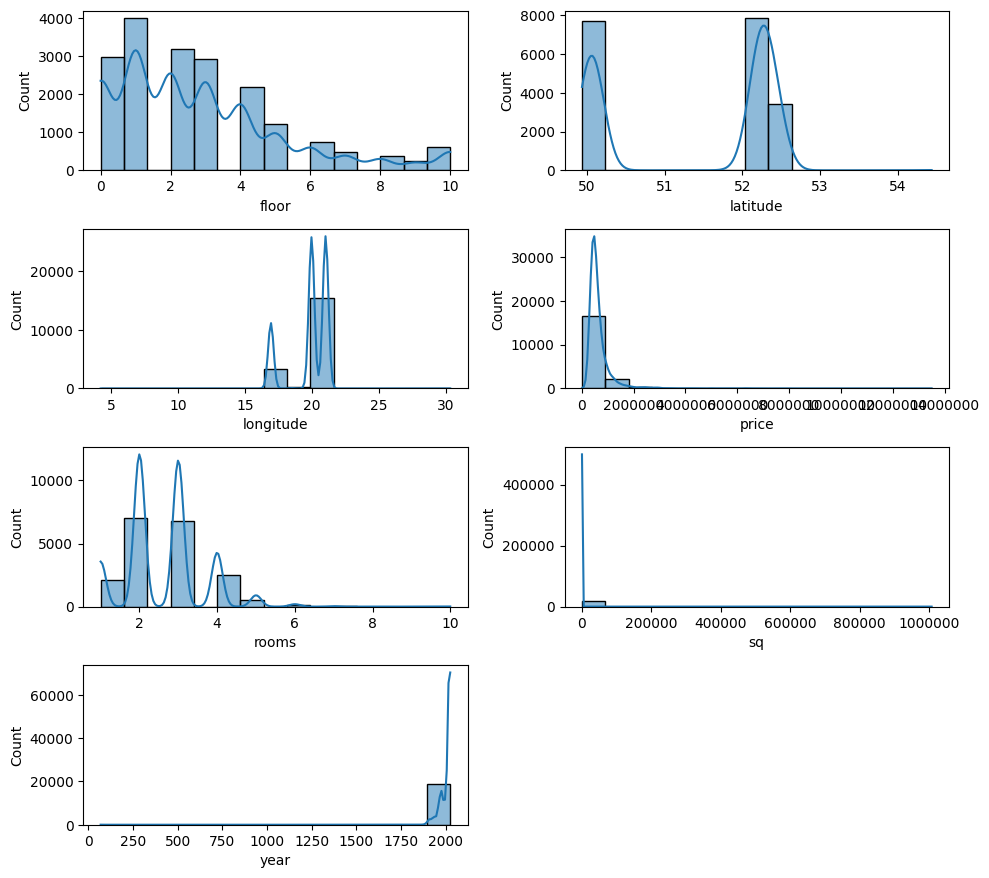

In [26]:
# checking data distributions, visualizing numerical data
def plot_histograms(df, columns, bins=15):
    plt.figure(figsize=(10, 15))

    for i, column in enumerate(columns, start=1):
        plt.subplot(len(columns), 2, i)
        sns.histplot(data=df, x=column, bins=bins, kde=True)
        plt.ticklabel_format(style='plain')


    plt.tight_layout()
    plt.show()

plot_histograms(data_train, numerical_cols)

### 2.2.1. Floor

In [27]:
data_train['floor'].value_counts()

1.0     3996
2.0     3198
0.0     2988
3.0     2923
4.0     2188
5.0     1222
6.0      752
10.0     623
7.0      486
8.0      378
9.0      257
Name: floor, dtype: int64

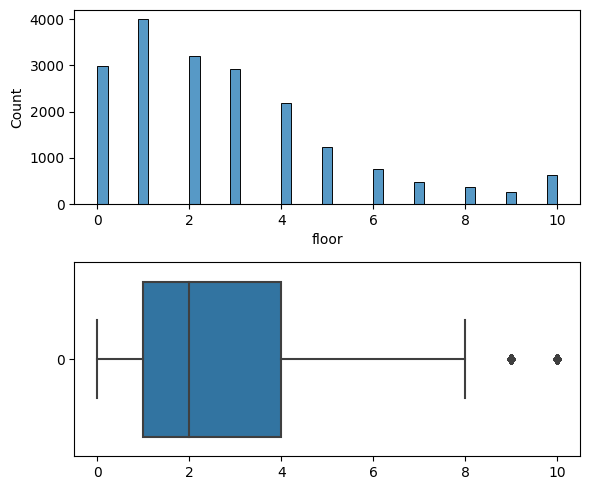

In [28]:
plt.figure(figsize=(6, 5))

plt.subplot(2, 1, 1)
sns.histplot(data=data_train['floor'])

plt.subplot(2, 1, 2)
sns.boxplot(data=data_train['floor'], orient='h')

plt.tight_layout()
plt.show()

* values above the 8th floor are outlieras, the range will be reduced to 8

In [29]:
data_train['floor']=data_train['floor'].apply(lambda x: 8 if x > 8 else x)

### 2.2.2. latitude and longitude

In [30]:
# Create the map
m_3 = folium.Map(location=[52.12,21.00], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in data_train.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)

# Display the map
m_3

* There are incorrect coordinates for 4 locations outside Poland and 9 in , we will check them carefully below and check these locations.

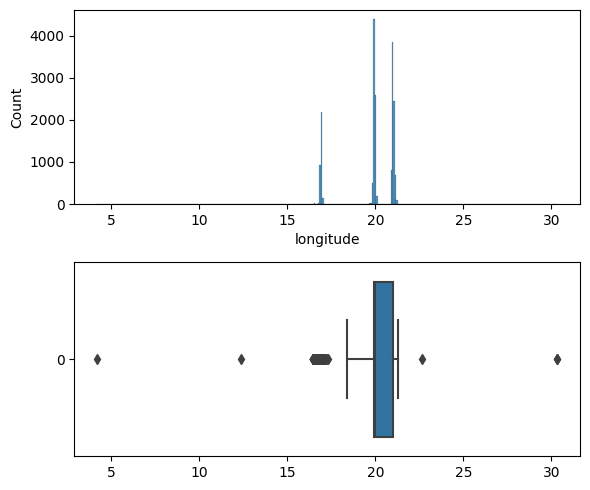

In [31]:
# outlier checking
plt.figure(figsize=(6, 5))

plt.subplot(2, 1, 1)
sns.histplot(data=data_train['longitude'])

plt.subplot(2, 1, 2)
sns.boxplot(data=data_train['longitude'], orient='h')

plt.tight_layout()
plt.show()

* The boxplot shows the outliers exactly as they appeared on the map. We will check them more closely

In [32]:
data_train[(data_train['longitude'] < 15) | (data_train['longitude'] > 23)]

address      city  floor       id  \
21692              Mokotów Sielce Górska 6/10  Warszawa    2.0  11461.0   
12804               Stare Miasto 29 Listopada    Kraków    1.0  22777.0   
5586   Podgórze Duchackie Nowos¹decka (rejon)    Kraków    1.0  21261.0   
3906                 Krowodrza Obo¿na( rejon)    Kraków    2.0  28581.0   

        latitude  longitude     price  rooms      sq    year  
21692  51.992072   4.204796  540000.0    2.0   43.85  1955.0  
12804  53.679035  12.368038  456000.0    3.0   57.80  2020.0  
5586   50.453340  30.319403  479000.0    3.0   56.80  1978.0  
3906   50.453340  30.319403  429000.0    7.0  207.00  1936.0

Below, incorrect values will be replaced in the dataset with the mean longitude values
for the corresponding city if the 'longitude' value in a given row falls outside the
range of 15-23. Otherwise, it retains the original 'longitude' value.

In [33]:
mean_longitude_by_city = data_train.groupby('city')['longitude'].mean()

def fill_invalid_longitude(row):
    city = row['city']
    longitude = row['longitude']

    if longitude < 15 or longitude > 23:
        return mean_longitude_by_city[city]
    else:
        return longitude

data_train['longitude'] = data_train.apply(fill_invalid_longitude, axis=1)

* check the lines with the location showing Pomeranian Voivodeship.

In [34]:
data_latitude_incor = data_train[(data_train['latitude'] > 53)]
data_latitude_incor

address      city  floor  \
6241                            Stare Miasto Bonerowska     Kraków    4.0   
20642                                Nowa Huta Centrum A    Kraków    5.0   
13906                                Nowa Huta Centrum C    Kraków    3.0   
6959   Praga-Po³udnie Goc³aw gen. Tadeusza Bora-Komor...  Warszawa    6.0   
11933                                Nowa Huta Centrum C    Kraków    3.0   
19609  Praga-Po³udnie Goc³aw gen. Tadeusza Bora-Komor...  Warszawa    2.0   
7751                                 Nowa Huta Centrum C    Kraków    3.0   
15185                           Stare Miasto Bonerowska     Kraków    4.0   
9598     Praga-Po³udnie gen. Tadeusza Bora-Komorowskiego  Warszawa    8.0   
12804                          Stare Miasto 29 Listopada    Kraków    1.0   
22032                                Nowa Huta Centrum D    Kraków    0.0   
5880            Praga-Po³udnie Goc³aw Bora-Komorowskiego  Warszawa    1.0   
19899                    Nowa Huta Czy¿yny Jana Paw³a II    Kraków    3.0   
11736  Praga-Po³udnie Goc³aw gen. Tadeusza Bora-Komor...  Warszawa    0.0   
3883                                 Nowa Huta Centrum C    Kraków    2.0   
22971           Praga-Po³udnie Goc³aw Bora-Komorowskiego  Warszawa    0.0   
13041                  Stare Miasto Kazimierz Pauliñska     Kraków    1.0   
4151   Praga-Po³udnie Goc³aw Genera³a Tadeusza Bora-K...  Warszawa    8.0   
2181                       Nowa Huta Aleja Jana Paw³a II    Kraków    0.0   
15089              Nowa Huta Czy¿yny Aleja Jana Paw³a II    Kraków    0.0   
21452  Praga-Po³udnie Goc³aw gen. Tadeusza Bora-Komor...  Warszawa    8.0   
11494    Praga-Po³udnie gen. Tadeusza Bora-Komorowskiego  Warszawa    7.0   

            id   latitude  longitude     price  rooms     sq    year  
6241   29474.0  54.435238  16.616842  790000.0    2.0  63.00  1910.0  
20642  22226.0  54.354049  16.446419  715000.0    3.0  75.80  1960.0  
13906  24935.0  54.354049  16.446419  415000.0    2.0  40.00  1954.0  
6959   13419.0  54.407448  18.588912  652000.0    3.0  79.80  1996.0  
11933  19572.0  54.354049  16.446419  415000.0    2.0  40.00  1969.0  
19609   8992.0  54.407448  18.588912  549000.0    3.0  61.40  1993.0  
7751   23193.0  54.354049  16.446419  415000.0    2.0  40.00  1950.0  
15185  29475.0  54.435238  16.616842  490000.0    2.0  42.00  1910.0  
9598   14041.0  54.407448  18.588912  777950.0    3.0  75.00  2007.0  
12804  22777.0  53.679035  19.956259  456000.0    3.0  57.80  2020.0  
22032  26838.0  54.354049  16.446419  595000.0    3.0  69.16  1953.0  
5880    7147.0  54.407448  18.588912  630000.0    2.0  43.89  2020.0  
19899  21496.0  54.354049  16.446419  385000.0    1.0  35.38  2009.0  
11736  16996.0  54.407448  18.588912  579000.0    3.0  68.90  1980.0  
3883   27278.0  54.354049  16.446419  380000.0    2.0  52.00  1950.0  
22971  16273.0  54.407448  18.588912  580000.0    3.0  68.90  1984.0  
13041  26222.0  54.435238  16.616842  890000.0    3.0  70.70  1936.0  
4151   13757.0  54.407448  18.588912  724000.0    3.0  69.00  2005.0  
2181   26531.0  54.354049  16.446419  568000.0    2.0  50.22  2009.0  
15089  29196.0  54.354049  16.446419  568000.0    2.0  50.22  2009.0  
21452  14084.0  54.407448  18.588912  950000.0    4.0  76.90  2010.0  
11494   7443.0  54.407448  18.588912  346000.0    2.0  33.40  1982.0

* Incorrect values, we will replace the average latitiude depending on the city.

In [35]:
krakow_latitude = 50.0647
krakow_longitude = 19.9450

warsaw_latitude = 52.2297
warsaw_longitude = 21.0122

poznan_latitude = 52.4064
poznan_longitude = 16.9252

In [36]:
data_latitude_incor.loc[data_latitude_incor['city'] == 'Kraków', 'latitude'] = krakow_latitude
data_latitude_incor.loc[data_latitude_incor['city'] == 'Kraków', 'longitude'] = krakow_longitude

data_latitude_incor.loc[data_latitude_incor['city'] == 'Warszawa', 'latitude'] = warsaw_latitude
data_latitude_incor.loc[data_latitude_incor['city'] == 'Warszawa', 'longitude'] = warsaw_longitude

data_latitude_incor.loc[data_latitude_incor['city'] == 'Poznań', 'latitude'] = poznan_latitude
data_latitude_incor.loc[data_latitude_incor['city'] == 'Poznań', 'longitude'] = poznan_longitude

# Aktualizacja danych w data_train na podstawie data_latitude_incor
data_train.update(data_latitude_incor, overwrite=True)

### 2.2.3. Price

<ipython-input-37-1d142954a545>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




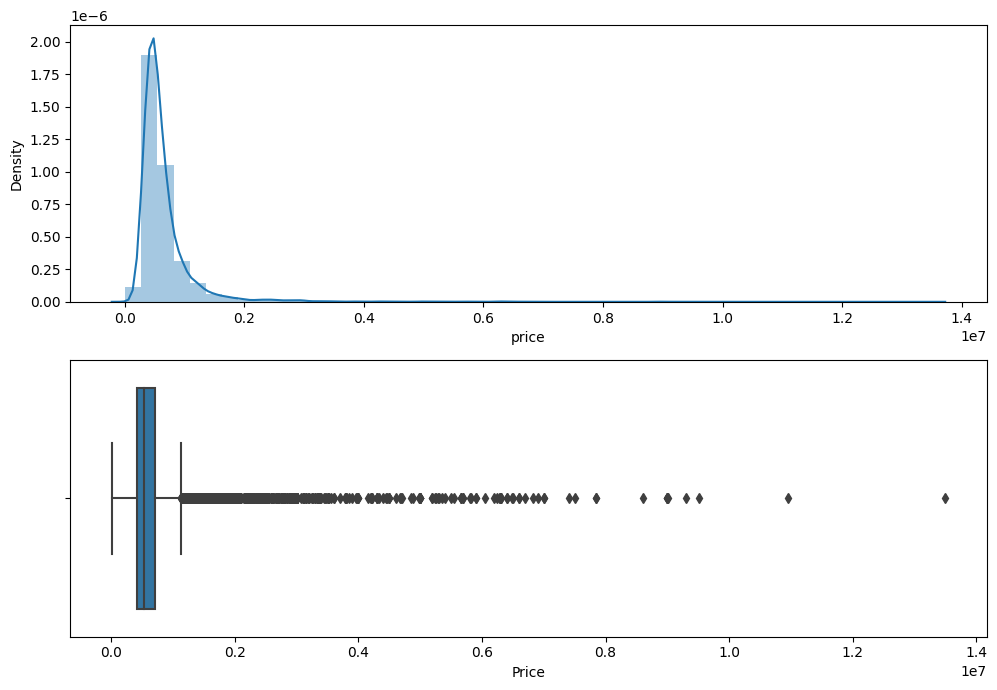

In [37]:
# visualizing house prices distribution
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
sns.distplot(data_train['price'], ax=axes[0])
sns.boxplot(x=data_train['price'], ax=axes[1])
axes[1].set_xlabel('Price')
plt.tight_layout()
plt.show()

In [38]:
(data_train['price'] >0.6e7).sum()

34

* Outliers are visible in high price ranges, due to individual values above 6000000 changing the price range to this value

In [39]:
data_train['price']=data_train['price'].apply(lambda x: 0.6e7 if x > 0.6e7 else x)

In [40]:
data_train['price'].sort_values()

10084       5000.0
22783      29900.0
23679      69000.0
11867      79900.0
21913      83000.0
           ...    
13662    6000000.0
7012     6000000.0
10036    6000000.0
1562     6000000.0
11295    6000000.0
Name: price, Length: 19011, dtype: float64

In [41]:
data_train[data_train['price'] < 100000]

address      city  floor  \
21913          Bie¿anów-Prokocim R¿¹ka Ludwika Rydygiera    Kraków    0.0   
10084                             Wola Muranów Pokorna 2  Warszawa    1.0   
4861   Dêbniki Kliny-Zacisze prof. Wojciecha Marii Ba...    Kraków    1.0   
8558                               Dêbniki Kliny-Zacisze    Kraków    0.0   
23679                                   Grunwald Górczyn    Poznañ    3.0   
13853                        Je¿yce Krzy¿owniki Gorajska    Poznañ    0.0   
11867                             Stare Miasto Winogrady    Poznañ    5.0   
22783                                              Wilda    Poznañ    1.0   

            id   latitude  longitude    price  rooms    sq    year  
21913  21089.0  50.008840  20.011045  83000.0    1.0  26.3  2002.0  
10084   6483.0  52.231958  21.006725   5000.0    2.0  50.0  2009.0  
4861   21888.0  49.998936  19.897453  89900.0    1.0  33.0  1999.0  
8558   25909.0  50.009696  19.905902  90000.0    1.0  39.0  2000.0  
23679    200.0  52.385155  16.880016  69000.0    1.0  33.0  2003.0  
13853   4167.0  52.431577  16.826483  98000.0    1.0  20.0  1995.0  
11867   4182.0  52.400663  16.919733  79900.0    3.0  48.5  2000.0  
22783   3363.0  52.389775  16.917438  29900.0    2.0  49.0  2003.0

* prices below PLN 50,000 are unrealistic, we will change the range from this value

In [42]:
data_train['price']=data_train['price'].apply(lambda x: 0.50000 if x < 50000 else x)

<ipython-input-43-c1d68a520e2d>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

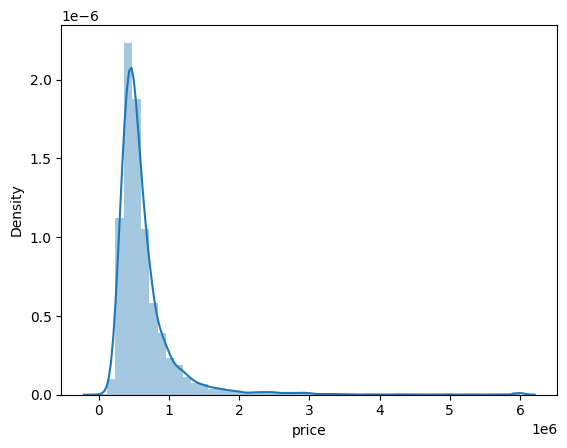

In [43]:
# check distribution again
sns.distplot(data_train['price'])

### 2.2.4. Rooms

In [44]:
data_train['rooms'].value_counts()

2.0     7028
3.0     6751
4.0     2490
1.0     2077
5.0      522
6.0      111
7.0       20
10.0       6
8.0        5
9.0        1
Name: rooms, dtype: int64

<ipython-input-45-2cc1ec2cf7b2>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




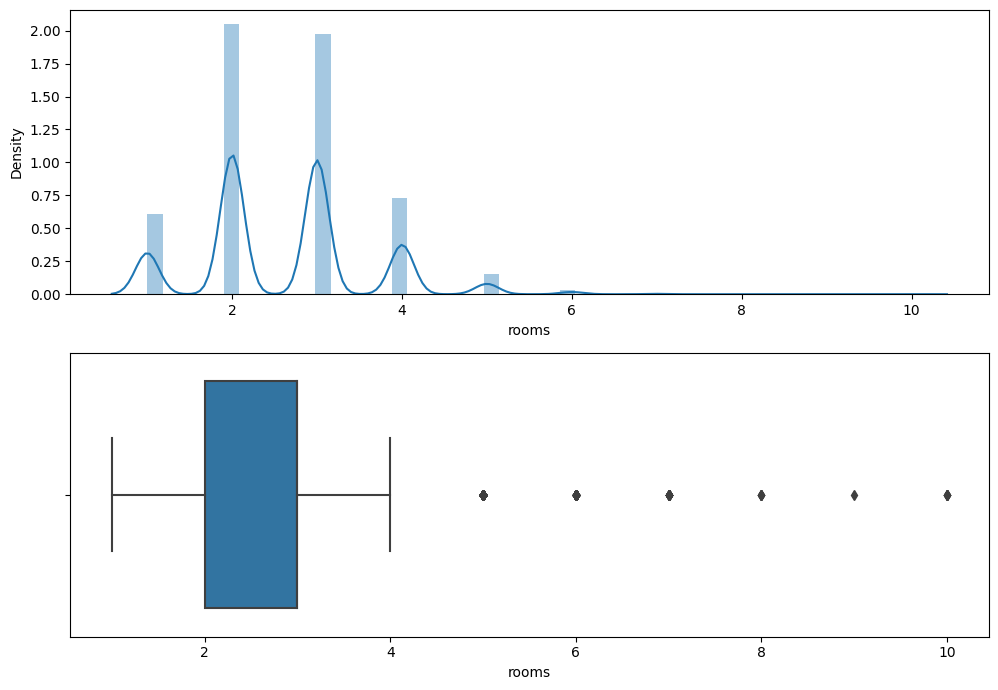

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
sns.distplot(data_train['rooms'], ax=axes[0])
sns.boxplot(x=data_train['rooms'], ax=axes[1])
axes[1].set_xlabel('rooms')  # Ustawienie etykiety osi x
plt.tight_layout()
plt.show()

In [46]:
(data_train['rooms']>5).sum()

143

* due to single property values with rooms over 5, we will reduce the range to this value.

In [47]:
data_train['rooms']=data_train['rooms'].apply(lambda x: 5 if x > 5 else x)

### 2.2.5. Sq

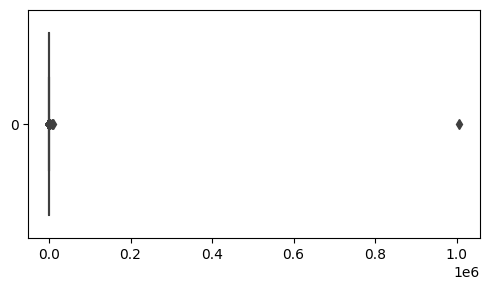

In [48]:
fig, axes = plt.subplots( figsize=(5, 3))
sns.boxplot(data=data_train['sq'], orient='h')

plt.tight_layout()
plt.show()

In [49]:
data_train[data_train['sq'] > 6000]

address      city  floor       id   latitude  \
6198        Pr¹dnik Bia³y Tonie    Kraków    2.0  22229.0  50.112182   
10798  Wawer ul. Przylaszczkowa  Warszawa    1.0  12896.0  52.231958   
18637   Stare Miasto Naramowice    Poznañ    1.0   1517.0  52.400663   

       longitude      price  rooms         sq    year  
6198   19.899440  1007185.0    5.0  1007185.0  2020.0  
10798  21.006725   389880.0    2.0     9000.0  2022.0  
18637  16.919733   544169.0    4.0     8065.0  2021.0

* due to large sq values, these lines will be skipped

In [50]:
data_train = data_train[data_train['sq'] <= 6000]

### 2.2.6. Year

<ipython-input-51-aadc21af5ade>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




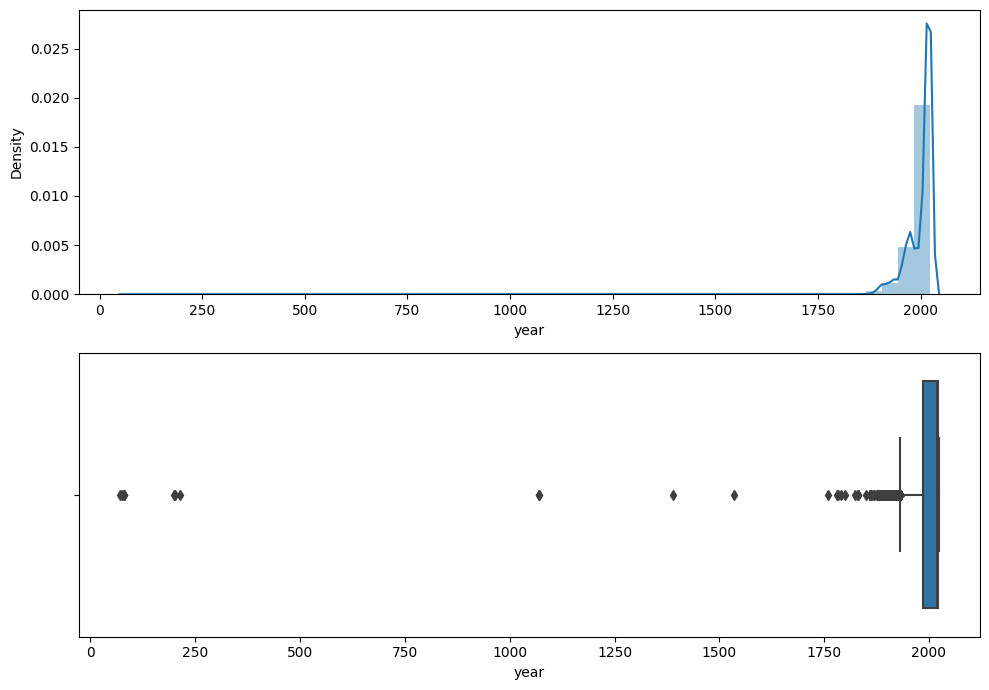

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
sns.distplot(data_train['year'], ax=axes[0])
sns.boxplot(x=data_train['year'], ax=axes[1])
axes[1].set_xlabel('year')
plt.tight_layout()
plt.show()

In [52]:
# check year below 1900
data_train[data_train['year'] < 1900]

address      city  floor  \
4192                        Stare Miasto Krowoderska    Kraków    2.0   
9687                             Podgórze Józefiñska    Kraków    0.0   
10290                                   Stare Miasto    Kraków    3.0   
1957                             ródmiecie Centrum    Kraków    3.0   
8059   ródmiecie ródmiecie Po³udniowe Nowy wiat  Warszawa    3.0   
...                                              ...       ...    ...   
1062                         Stare Miasto w. Krzy¿a    Kraków    1.0   
16281                         Stare Miasto Kazimierz    Kraków    0.0   
3913                       Stare Miasto w. Gertrudy    Kraków    2.0   
19334                         Stare Miasto Garbarska    Kraków    2.0   
21472           Stare Miasto Kazimierz w. Katarzyny    Kraków    2.0   

            id   latitude  longitude      price  rooms      sq    year  
4192   19406.0  50.072407  19.931720   949000.0    3.0   84.00  1890.0  
9687   19505.0  50.045677  19.953088   620000.0    3.0   64.50  1893.0  
10290  25818.0  50.059040  19.937168   754600.0    3.0   77.00  1885.0  
1957   26205.0  50.008800  19.959757   754600.0    3.0   77.00  1885.0  
8059   15890.0  52.231958  21.006725  1700000.0    4.0  114.00  1784.0  
...        ...        ...        ...        ...    ...     ...     ...  
1062   29162.0  50.063362  19.943342  1545000.0    4.0  100.00  1864.0  
16281  29466.0  50.051855  19.944947   620000.0    3.0   64.50  1892.0  
3913   19054.0  50.059435  19.941923   290000.0    1.0   14.81  1886.0  
19334  28207.0  50.065257  19.932917  1950000.0    3.0  114.00  1850.0  
21472  29353.0  50.049284  19.940905   880000.0    3.0   80.00  1880.0  

[113 rows x 10 columns]

* similarly to before, we will increase the range to 1900

In [53]:
# check year below 1900
data_train['year']=data_train['year'].apply(lambda x: 1900 if x < 1900 else x)

### Additional transformations

In [54]:
data_train.drop('address', axis=1, inplace=True)

In [55]:
data_train.drop('id', axis=1, inplace=True)

In [56]:
# Saving the DataFrame to a CSV file
data_train.to_csv('data_train.csv', index=False)

# 3. Data Pre-processing

## 3.1. Data Splitting

In [57]:
data_train.reset_index(drop=True, inplace=True)

In [58]:
# the features excluding the target variable
X = data_train.copy()

# This column represents the target variable,
# which is the variable we want to predict or model.
y = X.pop("price")

## 3.2. Encoding categorical variables
* OrdinalEncoder is a data preprocessing technique used in machine learning to encode categorical variables with ordinal (ordered) values into numerical values. It assigns a unique integer to each category based on its order, preserving the ordinal relationship among categories. This allows machine learning models to work with such categorical data by treating it as numerical data.

In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

## 3.3. Checking the relationship between features by MI
* Mutual Information (MI) is a measure that helps determine how strongly two variables are related. In the context of machine learning, it is used to evaluate which features or variables are more informative for a given predictive task, leading to improved models and more effective feature selection.

In [60]:
discrete_features = X.dtypes == int

In [61]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

sq           1.332320
latitude     0.672429
longitude    0.665813
year         0.440699
rooms        0.365874
city         0.195811
floor        0.154967
Name: MI Scores, dtype: float64

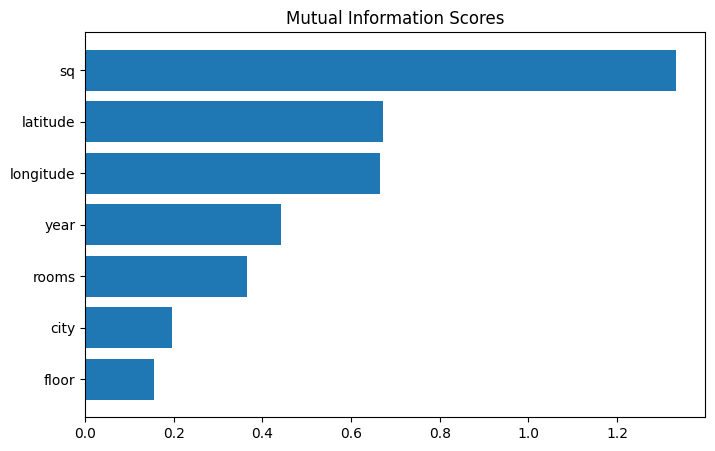

In [62]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# this represents relationships from the strongest

* Checking the relationship between price and ssq depending on the town

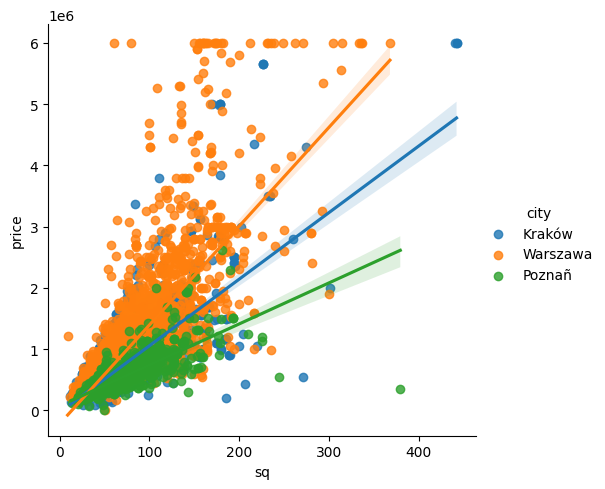

In [63]:
sns.lmplot(x="sq", y="price", hue="city", data=data_train);

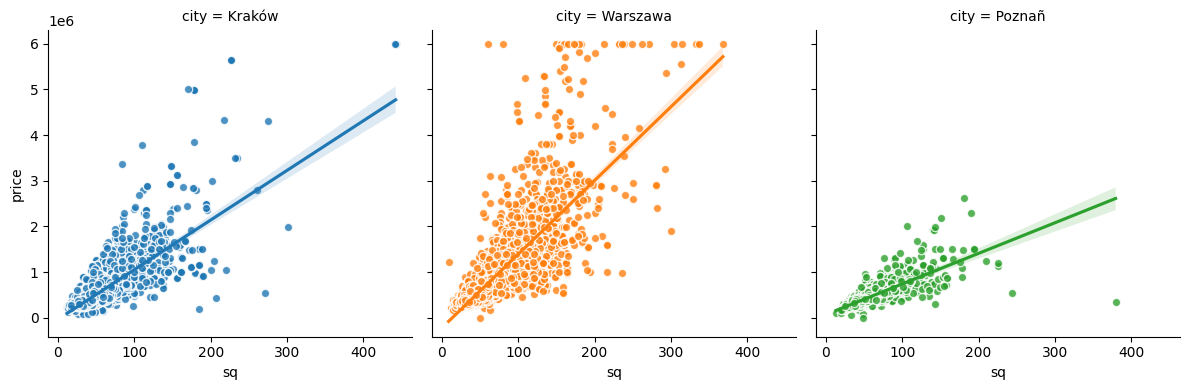

In [64]:
feature = "sq"

sns.lmplot(
    x=feature, y="price", hue="city", col="city",
    data=data_train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

## 3.4. Standardization

In [65]:
# standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [67]:
X_scaled

city     floor  latitude  longitude     rooms        sq      year
0     -1.110029 -0.765102 -1.174491   0.002556  2.479169  2.804978  0.673631
1      1.091613  2.320817  0.728034   0.788819  0.402305 -0.131114 -1.077369
2      1.091613 -0.765102  0.752363   0.816394  0.402305  1.854244 -0.013036
3     -0.009208 -0.324256  0.942316  -2.039021  0.402305 -0.071693  0.639297
4      1.091613  0.116589  0.796807   0.782693  2.479169  3.643862  0.124298
...         ...       ...       ...        ...       ...       ...       ...
19003 -0.009208 -1.205947  0.941104  -2.007177 -0.636127 -0.805017  0.673631
19004  1.091613 -0.765102  0.728547   0.864604  1.440737  1.686467  0.639297
19005 -1.110029  0.116589 -1.202605   0.048679  1.440737  2.804978 -3.480701
19006 -1.110029  0.557435 -1.247100   0.098309  1.440737  0.329922  0.673631
19007 -0.009208 -0.324256  0.954987  -2.050228  2.479169  2.681592  0.639297

[19008 rows x 7 columns]

## 3.5. Principal Component Analysis (PCA)
* is a dimensionality reduction technique used in data analysis and machine learning. It aims to reduce the dimensionality of a dataset while preserving as much of the original variance as possible. PCA identifies and extracts a set of new, uncorrelated variables called principal components from the original dataset.
* Pricipal Component (PC) - linearly uncorrelated vectors, with high variance, created from features in the dataset

In [68]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.674648  4.086871 -0.122496  0.142945 -0.620526  0.294569  0.003863
1  1.919392 -0.418448 -1.601828 -0.450940  1.488797 -0.472874 -0.036793
2  1.700479  1.176650 -0.022433  0.505537 -1.059242  0.977524 -0.006085
3  0.093928  0.310081  2.225475 -0.342168  0.690625 -0.273356 -0.001523
4  2.589048  3.769256 -0.431089  0.052452 -0.433396  0.777860  0.015105

In [69]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
city       0.674968 -0.182707  0.040659 -0.024125 -0.174541 -0.017549   
floor      0.169438 -0.049539 -0.443007 -0.556494  0.680358 -0.002949   
latitude   0.620650 -0.161153  0.392875 -0.022115  0.071180 -0.014366   
longitude  0.195157 -0.071300 -0.748226 -0.011366 -0.550481 -0.024393   
rooms      0.170163  0.686818 -0.010249  0.020627  0.014770 -0.706096   
sq         0.214019  0.670233 -0.044524  0.060902  0.019385  0.706327   
year      -0.132878  0.110358  0.292935 -0.827635 -0.444926  0.037590   

                PC7  
city      -0.691396  
floor      0.000190  
latitude   0.654760  
longitude  0.305344  
rooms     -0.002507  
sq         0.004254  
year      -0.001412

* Creates a DataFrame called loadings that contains the loadings of principal components from the results of Principal Component Analysis (PCA)

In [70]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.913727
PC1    0.818411
PC4    0.731839
PC6    0.725369
PC5    0.624175
PC3    0.596002
PC7    0.546946
Name: MI Scores, dtype: float64

* MI Scores (Mutual Information Scores): These scores are commonly used in feature selection or dimensionality reduction tasks. They represent the mutual information between each feature and some target variable. Higher MI scores indicate a stronger relationship between the feature and the target variable.
* These scores suggest the importance of each Principal Component (PC) in capturing information related to the target variable.

In [71]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

* This code defines a function called plot_variance, which is used to generate plots that illustrate the explained variance using Principal Component Analysis (PCA).

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

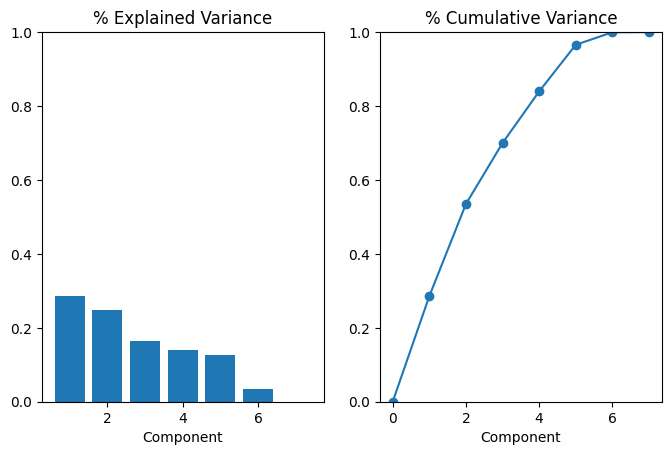

In [72]:
plot_variance(pca)

* The graph shows that the first 5 factors can explain over 95% of the total variance.

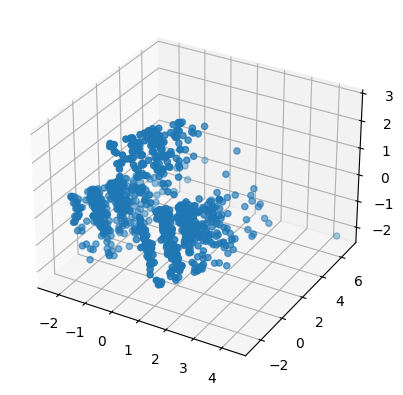

In [73]:
# creates a three-dimensional (3D) scatter plot for PC1,PC2,PC3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca.iloc[:1000, 0], X_pca.iloc[:1000, 1], X_pca.iloc[:1000, 2])

plt.show()

* There are three groups visible, depending on the city, illustrate it below.

In [74]:
# check how these data look like for individual cities
X_pca_city = X_pca.copy()
X_pca_city['city'] = data_train['city']

In [75]:
X_pca_city.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.674648  4.086871 -0.122496  0.142945 -0.620526  0.294569  0.003863   
1  1.919392 -0.418448 -1.601828 -0.450940  1.488797 -0.472874 -0.036793   
2  1.700479  1.176650 -0.022433  0.505537 -1.059242  0.977524 -0.006085   
3  0.093928  0.310081  2.225475 -0.342168  0.690625 -0.273356 -0.001523   
4  2.589048  3.769256 -0.431089  0.052452 -0.433396  0.777860  0.015105   

       city  
0    Kraków  
1  Warszawa  
2  Warszawa  
3    Poznañ  
4  Warszawa

In [76]:
# create plot
trace0 = go.Scatter(
    x = X_pca_city.loc[:200,'PC1'],
    y = X_pca_city.loc[:200,'PC2'],
    text=X_pca_city['city'],
    textposition="top center",
    name = 'Piony',
    mode = 'markers+text',
    marker = dict(
        size = 10,
        color = 'rgb(228,26,28)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
        )
    )
)

data = [trace0]

layout = dict(title = 'City-based Real Estate Similarity using PCA',
              yaxis = dict(zeroline = False, title ='PC2 (principal component 2)'),
              xaxis = dict(zeroline = False, title ='PC1 (principal component 1)'),
              width = 1000,
              height =600
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

# 4. Modeling

## 4.1. Algorithm Selection

* Defines a function score_dataset that assesses the performance of regression models on a dataset.
* If the models argument is not provided, it defines three regression models:
     * "SGD Regressor": Bayesian Ridge regression model
     * "Random Forest": Random Forest regression model
     * "XGB Regressor": XGBoost regression model
The function then proceeds to evaluate the performance of each model using cross-validation.

* It calculates the mean absolute error (MAE) for each model using cross_val_score. MAE measures the average absolute differences between the predicted and actual target values.
It calculates the R-squared (R2) score for each model using cross_val_score. R2 measures the proportion of variance in the target variable that is predictable from the feature variables.

This function can be used to quickly compare the performance of different regression models on a given dataset and choose the best-performing model for further analysis or prediction.

In [77]:
def score_dataset(X, y, models=None):

    if models is None:
        models = {
            "SGD Regressor": linear_model.BayesianRidge(),
            "Random Forest": RandomForestRegressor(random_state=42),
            "XGB Regressor": XGBRegressor(random_state=42)
        }

    results = {}

    for model_name, model in models.items():

        mae_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
        mae_scores = -1 * mae_scores
        mean_mae_score = np.mean(mae_scores)

        r2_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
        mean_r2_score = np.mean(r2_scores)

        results[model_name] = {
            "MAE": mean_mae_score,
            "R2": mean_r2_score
        }

    return results

### 4.1.1. Selection of the best transformation of variables for further modeling

In [78]:
# using X_scaled
score_dataset(X_scaled, y)

{'SGD Regressor': {'MAE': 155486.53487676624, 'R2': 0.6360256341393462},
 'Random Forest': {'MAE': 73106.40132389481, 'R2': 0.8571980192434132},
 'XGB Regressor': {'MAE': 79671.41635467275, 'R2': 0.8582755362484857}}

In [79]:
# using basic X without scales
score_dataset(X, y)

{'SGD Regressor': {'MAE': 155494.74438003666, 'R2': 0.6359945829131801},
 'Random Forest': {'MAE': 73029.85764114188, 'R2': 0.8573126457801161},
 'XGB Regressor': {'MAE': 79803.5879404945, 'R2': 0.8591715352389601}}

In [80]:
# using only X_pca
score_dataset(X_pca, y)

{'SGD Regressor': {'MAE': 155486.53487676624, 'R2': 0.6360256341393462},
 'Random Forest': {'MAE': 87788.94078314235, 'R2': 0.8214807352794382},
 'XGB Regressor': {'MAE': 96923.0950814335, 'R2': 0.8097384100587843}}

In [81]:
# using selected X_pca with first 4 columns
X_pca_selected = X_pca.iloc[:, :4]
score_dataset(X_pca_selected, y)

{'SGD Regressor': {'MAE': 202986.70364390622, 'R2': 0.4761308608058867},
 'Random Forest': {'MAE': 108217.36879957104, 'R2': 0.7451459461396507},
 'XGB Regressor': {'MAE': 125054.11217385584, 'R2': 0.6917106375913519}}

In [82]:
# creating a new "NewFeature_PC6" reflecting the impact of "rooms" and "sq" on PC6
X['NewFeature_PC6'] = (-0.71 * X['rooms']) + (0.71 * X['sq'])
score_dataset(X, y)

{'SGD Regressor': {'MAE': 155498.56564151435, 'R2': 0.6359841737996381},
 'Random Forest': {'MAE': 73503.82761381815, 'R2': 0.855313184225557},
 'XGB Regressor': {'MAE': 80698.08493324435, 'R2': 0.8538327284737258}}

In [83]:
X.drop('NewFeature_PC6',axis=1, inplace=True)

**The selection of the best model**

* the best results were obtained for X X without scales, "Random Forest" seems to provide the best results as it has the lowest MAE (72,951) and a high R2 (0.857). This indicates that the "Random Forest" model can more accurately predict real estate prices and explain the variability in the data. It will be used for further modeling.

## 4.2. Data Test Preparation

In [84]:
# The test part will be prepared similarly to the training part
data_test.reset_index(drop=True, inplace=True)
data_test.drop(data_test[['address','id']],axis=1, inplace=True)
X_test = data_test.copy()
y_test = X_test.pop("price")
X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

In [85]:
X_test

city  floor   latitude  longitude  rooms     sq    year
0      0.0    5.0  50.018879  19.972644    2.0  31.00  2009.0
1      2.0    1.0  52.201321  20.962718    4.0  94.04  2000.0
2      0.0    6.0  50.058788  19.950060    3.0  81.75  2020.0
3      0.0    2.0  49.998832  19.893878    3.0  67.31  2020.0
4      2.0    1.0  52.252029  20.924686    2.0  53.00  2000.0
...    ...    ...        ...        ...    ...    ...     ...
4748   2.0    2.0  52.220358  21.137083    3.0  55.63  2020.0
4749   0.0    3.0  50.059040  19.937168    1.0  28.24  2020.0
4750   2.0    5.0  52.229581  20.996557    1.0  24.72  1970.0
4751   0.0    0.0  50.086310  19.913988    2.0  52.50  2013.0
4752   2.0   10.0  52.229999  20.957842    3.0  50.00  2021.0

[4753 rows x 7 columns]

## 4.3. Model Evaluation

In [86]:
# Create the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'bootstrap': [True],
    'max_depth': [15],
    'max_features': [5,10],
    'min_samples_leaf': [5,10],
    'min_samples_split': [10,15],
    'n_estimators': [1000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error')

# Fit the model to the training data
grid_search.fit(X, y)

# Select the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Predict on the train set
y_pred_train = best_model.predict(X)
# Print the best parameters of the model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [87]:
print('Results for train data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y,y_pred_train),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y, y_pred_train),2)))

Results for train data
Random Forest Regressor R2 score: 0.92
Random Forest Regressor MAE score: 57989.44


In [88]:
print('Results for test data')
print('Random Forest Regressor R2 score: '+ str(round(r2_score(y_test, y_pred),2)))
print('Random Forest Regressor MAE score: '+ str(round(mae(y_test, y_pred),2)))

Results for test data
Random Forest Regressor R2 score: 0.8
Random Forest Regressor MAE score: 77088.83


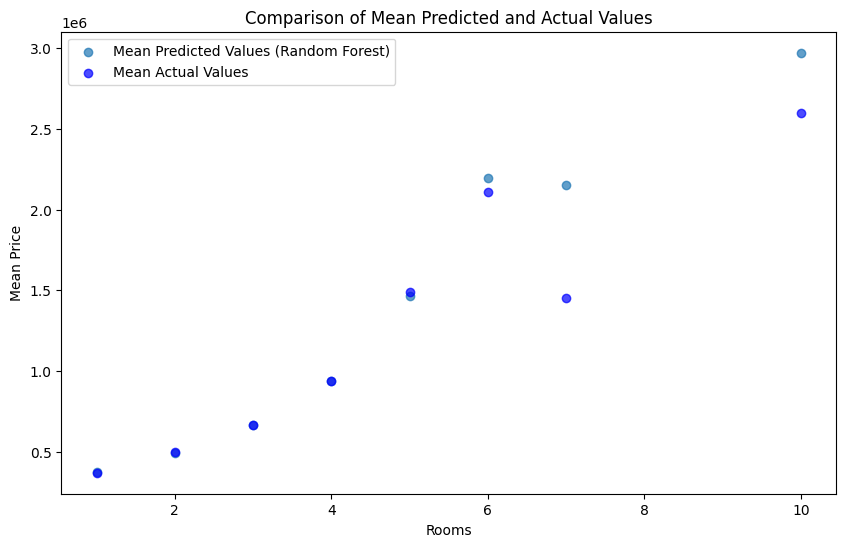

In [89]:
models = ['Random Forest']
y_preds = [y_pred]
x_test = X_test['rooms']
y_true = y_test

plt.figure(figsize=(10, 6))

for model, y_pred in zip(models, y_preds):
    # Grouping data by rooms and calculating mean values
    unique_x_test = np.unique(x_test)
    mean_y_pred = [np.mean(y_pred[x_test == x]) for x in unique_x_test]

    # Creating the plot
    plt.scatter(unique_x_test, mean_y_pred, label=f"Mean Predicted Values ({model})", alpha=0.7)

# Calculating mean actual values based on y_test
mean_y_test = [np.mean(y_test[x_test == x]) for x in unique_x_test]

# Adding actual values to the plot
plt.scatter(unique_x_test, mean_y_test, label="Mean Actual Values", color="blue", alpha=0.7)

plt.xlabel("Rooms")
plt.ylabel("Mean Price")
plt.legend()
plt.title("Comparison of Mean Predicted and Actual Values")
plt.show()

For the train data Random Forest Regressor R2 score: 0.92
Random Forest Regressor MAE (Mean Absolute Error) score: 57989.44
These results indicate how well the Random Forest model fits the training data. An R2 score of 0.92 suggests that the model explains 92% of the variance in the target variable, which is a good fit. The MAE score of 57989.44 represents the average absolute error between the predicted and actual values on the training data.

For the test data Random Forest Regressor R2 score: 0.8
Random Forest Regressor MAE (Mean Absolute Error) score: 77088.83
These results show the model's performance on unseen data (the test dataset). An R2 score of 0.8 suggests that the model explains 80% of the variance in the test data, indicating good predictive capability. The MAE score of 77088.83 represents the average absolute error between the predicted and actual values on the test data.

In summary, the Random Forest Regressor model performs well on both the training and test datasets, with a higher R2 score and lower MAE score on the training data compared to the test data. This indicates that while the model fits the training data well, it may exhibit some degree of overfitting when applied to new, unseen data.

###  Additionally, creation of a neural network

In [90]:
X_scaled_test = scaler.transform(X_test)

In [91]:
# define NN model
def basic_model():
    model = Sequential()
    model.add(Dense(64, activation="tanh", kernel_initializer='normal', input_dim=X_scaled.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation="relu", kernel_initializer='normal',
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation="relu", kernel_initializer='normal',
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    model.add(Dropout(0.1))
    model.add(Dense(36, activation="relu", kernel_initializer='normal'))
    model.add(Dropout(0.0))
    model.add(Dense(1))
    model.compile(
        loss='mean_squared_error',
        optimizer='adam',
        metrics=[metrics.mae])
    return model

In [92]:
model = basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 36)                2

In [93]:
epochs = 500
batch_size = 128

In [94]:
keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=0)
]

In [95]:
history = model.fit(X_scaled, y,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0,
    validation_data=(X_scaled_test, y_test),
    callbacks=keras_callbacks)

In [96]:
train_score = model.evaluate(X_scaled, y, verbose=0)
valid_score = model.evaluate(X_scaled_test, y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  136409.0469 , Train Loss:  77773316096.0
Val MAE:  133806.6562 , Val Loss:  93308928000.0


* results

In [97]:
# This function allows plotting of the training history
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)

    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot it all in IPython
    plt.draw()
    plt.show()

    return

<ipython-input-97-67f05a51adab>:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-97-67f05a51adab>:18: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



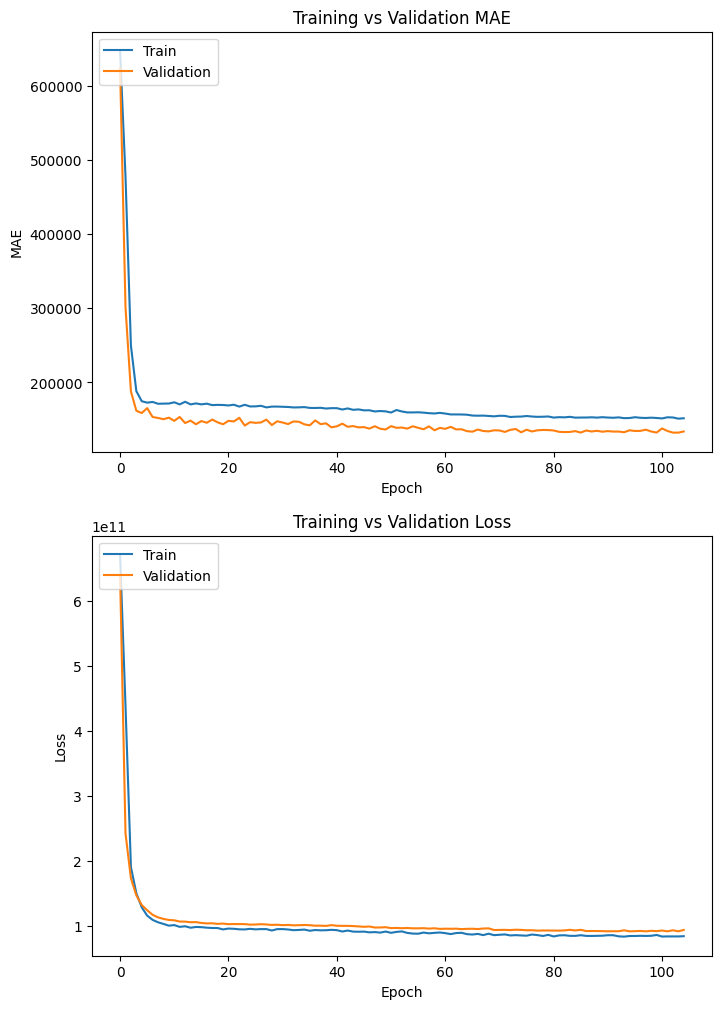

In [98]:
plot_hist(history.history, xsize=8, ysize=12)

* As we can see, the results obtained (much higher MAE) are worse than for ML methods. Perhaps using a more advanced NN model would improve the results.